<a href="https://colab.research.google.com/github/Naman1822/Play-Store-App-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
#Importing libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Using pandas library, 'read_csv' function to read Play Store Data & User Reviews csv file
app_data = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone project/EDA-Play Store App reviews/Play Store Data.csv")
user_reviews = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone project/EDA-Play Store App reviews/User Reviews.csv")

#Examing head of Play Store data csv file 
app_data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
#Examing head of User Reviews data csv file
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
#checking amount of rows & columns in given dataset to understand the size we are working with
app_data.shape

(10841, 13)

In [ ]:
user_reviews.shape

(64295, 5)

In [ ]:
#checking type of every column in the dataset,how many null values and the unique values in the columns by creating a function 
#function will help us to find out first how many columns we have in the data set
#using 'sum' function will show us how many nulls are found in each column in dataset
#function will tell us,in every column how many unique values we have
def info(df):
    temp = pd.DataFrame(index=app_data.columns)
    temp['data_type'] = df.dtypes
    temp['null_count'] = df.isnull().sum()
    temp['unique_count'] = df.nunique()
    return temp

print(info(app_data))

               data_type  null_count  unique_count
App               object           0          9660
Category          object           0            34
Rating           float64        1474            40
Reviews           object           0          6002
Size              object           0           462
Installs          object           0            22
Type              object           1             3
Price             object           0            93
Content Rating    object           1             6
Genres            object           0           120
Last Updated      object           0          1378
Current Ver       object           8          2832
Android Ver       object           3            33


In [ ]:
user_reviews.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

After loading the dataset in and from the head of Play_Store_data dataset and User_reviews dataset,we can see a number of things. These 13 columns provide a very rich amount of information for deep data exploration in play_store_data and 5 columns in user_reviews  we can do on this dataset. We do already see some null values, which will require cleaning and handling of NaN values. Later, we may need to continue with mapping certain values to ones and zeros for predictive analytics.

Making a copy for the understanding, wrangling and cleaning of the data, so that original data doesn't get effected, if we want too refer something from that data in future we can easily do that.

In [ ]:
#Making a copy of app_data Dataframe for all further operations
app_data_1 = app_data.copy()

In [ ]:
#Making a copy of user_reviews Dataframes for all further operations
user_reviews_1 = user_reviews.copy()
user_reviews_1.shape

(64295, 5)

# **Understadning, Wrangling and Cleaning Data**
Presenting the code and methods for acquiring the data. Loading the data into appropriate format for analysis. Explaining the process and results

In our case, missing data that is observed does not need too much special treatment. Looking into the nature of our dataset we can state further things: columns "Type","Content rating" and "Rating" need very simple handling. To elaborate, "Type" is free or paid; if there were no types for the listing - type simply will Free.  For "Content Rating" column we can simply append it with everyone for missing values. For "Rating" all the missing values we have replaced it the mean of rating so there is no diffirence in the mean of Rating.

In [ ]:
app_data_1['Type'].fillna("Free", inplace = True)

In [ ]:
app_data_1['Content Rating'].fillna("Everyone", inplace = True)

In [ ]:
#replacing all NaN values in 'Rating' with mean
MeanRating = app_data_1['Rating'].mean()

app_data_1.fillna({'Rating':MeanRating},inplace=True)

In our case, columns "Size", "Installs", "Price" and "Reviews" we have removed the unnecessary elements like- ',' '+’, and changed their data type as per the requirement



In [ ]:
ModeSize = app_data_1['Size'].mode()
app_data_1['Size'] = app_data_1.Size.apply(lambda x: x.strip('+'))          # Removing the + Sign
app_data_1['Size'] = app_data_1.Size.apply(lambda x: x.replace(',', ''))    # For removing the `,`
app_data_1['Size'] = app_data_1.Size.apply(lambda x: x.replace('M', 'e+6')) # For converting the M to Mega
app_data_1['Size'] = app_data_1.Size.apply(lambda x: x.replace('k', 'e+3')) # For convertinf the K to Kilo
app_data_1['Size'] = app_data_1.Size.replace('Varies with device', np.NaN)  # Replacing "Varies with device" with NaN
app_data_1['Size'] = pd.to_numeric(app_data_1['Size'])                      # Converting the string to Numeric type

app_data_1.dropna(subset = ['Size'], inplace=True)

In [ ]:
app_data_1['Installs'] = app_data_1.Installs.apply(lambda x: x.strip('+'))        # Removing the + Sign
app_data_1['Installs'] = app_data_1.Installs.apply(lambda x: x.replace(',', ''))  # For removing the `,`
app_data_1 = app_data_1.drop(10472)                                               # Dropping row no. 10472 
app_data_1['Installs'] = pd.to_numeric(app_data_1['Installs'])                    # Changing the Data Type to int/float

In [ ]:
app_data_1['Price'] = app_data_1.Price.apply(lambda x: x.strip('$'))  # Removing "$"
app_data_1['Price'] = pd.to_numeric(app_data_1['Price'])              # Changing the data type to int/float

In [ ]:
app_data_1['Reviews'] = pd.to_numeric(app_data_1['Reviews'])          # Changing the data type to int/float

In [ ]:
#Renaming the column
app_data_1.rename(columns={'Content Rating':'Content_Rating'}, inplace = True)

In [ ]:
#Removing the reviews with null values from user_reviews_1
user_reviews_1.drop(user_reviews_1[user_reviews_1.Translated_Review.isnull()].index, inplace = True)
user_reviews_1.shape

(37427, 5)

Please note that we are dropping'Current Ver' and Android Ver'not only because it is insignificant but also for ethical reasons. There should be no reasoning to continue data exploration and model training (which we will be doing later) towards specific individuals based on their versions. therefore names are unimportant to us.

In [ ]:
#Droppin two unnecessary columns
app_data_1.drop(["Current Ver" , "Android Ver", 'Last Updated'] , axis = 1, inplace = True)

In [ ]:
info(app_data_1)

,data_type,null_count,unique_count
App,object,0.0,8434.0
Category,object,0.0,33.0
Rating,float64,0.0,40.0
Reviews,int64,0.0,4680.0
Size,float64,0.0,459.0
Installs,int64,0.0,20.0
Type,object,0.0,2.0
Price,float64,0.0,87.0
Content Rating,NaN,NaN,NaN
Genres,object,0.0,116.0


In [ ]:
#checking null values in app_data_1
app_data_1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
dtype: int64

In [ ]:
#Checking the null values in user_reviews_1
user_reviews_1.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
app_data_1.shape

(9145, 10)

In [ ]:
app_data_1.describe()

,Rating,Reviews,Size,Installs,Price
count,9145.000000,9.145000e+03,9.145000e+03,9.145000e+03,9145.000000
mean,4.176869,2.490487e+05,2.151653e+07,7.114842e+06,1.184366
std,0.500675,1.716211e+06,2.258875e+07,4.619357e+07,17.355754
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,4.100000,2.200000e+01,4.900000e+06,1.000000e+03,0.000000
50%,4.200000,7.420000e+02,1.300000e+07,1.000000e+05,0.000000
75%,4.500000,2.503700e+04,3.000000e+07,1.000000e+06,0.000000
max,5.000000,4.489389e+07,1.000000e+08,1.000000e+09,400.000000


In [ ]:
user_reviews_1.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


# Exploring and Visualizing 
Exploring the data by analyzing its statistics and visualizing the values of Apps and correlations between different features. Explaining the process and the results

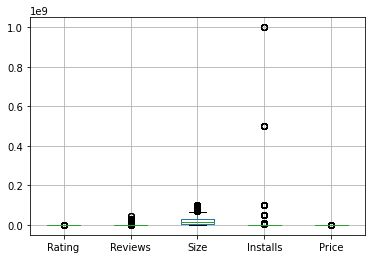

In [ ]:
#Box Plot for different columns together and seperately
boxplot = app_data_1.boxplot(column=['Rating',	'Reviews',	'Size', 'Installs', 'Price']) 

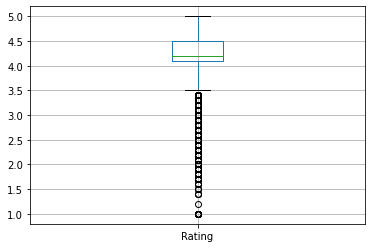

In [ ]:
boxRate = app_data_1.boxplot(column=['Rating'])

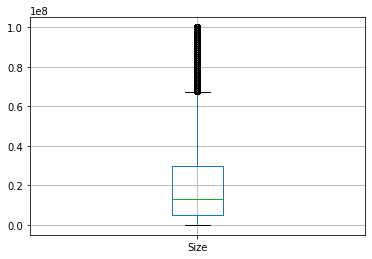

In [ ]:
boxSize = app_data_1.boxplot(column=['Size'])

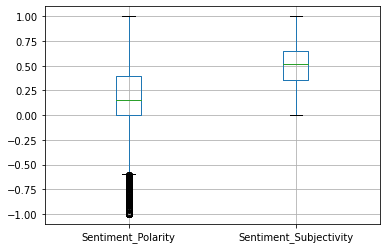

In [ ]:
#Box Plot of 'Sentiment_Polarity' &	'Sentiment_Subjectivity'
user_reviews_1.boxplot(column=['Sentiment_Polarity',	'Sentiment_Subjectivity'])

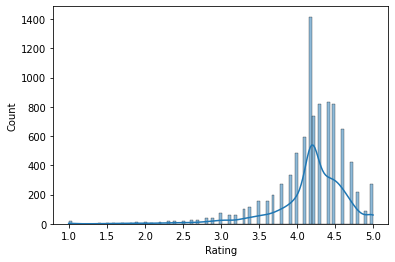

In [ ]:
#Histogram for Rating
sns.histplot(data=app_data_1, x="Rating", kde=True)

In [ ]:
app_data_1.App.value_counts()

ROBLOX                                           9
Candy Crush Saga                                 7
8 Ball Pool                                      7
Subway Surfers                                   6
Nick                                             6
                                                ..
AC Remote for Midea - NOW FREE                   1
LG AC Smart Diagnosis                            1
Plug-in app (System AC)                          1
AC Remote for LG - NOW FREE                      1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 8434, dtype: int64

In [ ]:
#getting App count according to No. of Installs
app_data_1.Installs.value_counts()

1000000       1303
100000        1054
10000         1011
1000           873
10000000       825
100            702
5000000        535
500000         492
5000           461
50000          446
10             376
500            322
100000000      201
50             201
50000000       147
5               78
1               64
500000000       30
0               14
1000000000      10
Name: Installs, dtype: int64

In [ ]:
#Getting App count according to Content_Rating
app_data_1["Content_Rating"].value_counts()

Everyone           7416
Teen                987
Mature 17+          406
Everyone 10+        332
Adults only 18+       2
Unrated               2
Name: Content_Rating, dtype: int64

In [ ]:
#Getting App counts wrt Price
app_data_1.Price.value_counts()

0.00      8421
0.99       145
2.99       114
1.99        66
4.99        65
          ... 
389.99       1
19.90        1
1.75         1
14.00        1
1.04         1
Name: Price, Length: 87, dtype: int64

In [ ]:
#Getting sorted App Count according to Category
app_data_category_count  = app_data_1['Category'].value_counts()
app_data_category_count = app_data_category_count.sort_values(ascending=False)

print(app_data_category_count.head())

FAMILY      1832
GAME        1015
TOOLS        739
MEDICAL      434
BUSINESS     400
Name: Category, dtype: int64


In [ ]:
#Getting App Counts
user_reviews_1.App.value_counts()

Bowmasters                        312
Helix Jump                        273
Angry Birds Classic               273
Calorie Counter - MyFitnessPal    254
Duolingo: Learn Languages Free    240
                                 ... 
Draw a Stickman: EPIC 2             1
HD Camera                           1
Draw In                             1
Draw A Stickman                     1
Best Fiends - Free Puzzle Game      1
Name: App, Length: 865, dtype: int64

In [ ]:
#Getting Sentiment Counts
user_reviews_1.Sentiment.value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

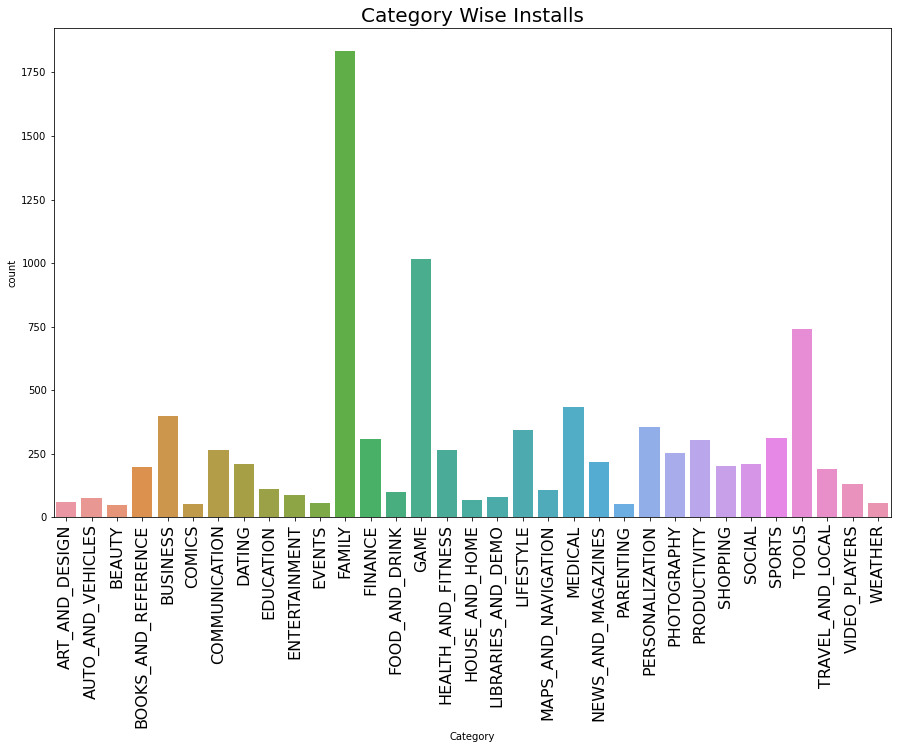

In [ ]:
#Plotting Category Wise Installs
plt.figure(figsize=(15,9))

graph = sns.countplot(x = "Category", data= app_data_1.sort_values(["Category"]))
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=16)
graph.set_title("Category Wise Installs", fontsize = 20);

In [ ]:
#Plotting Correlation of the Data
corr = app_data_1.corr()

<function matplotlib.pyplot.show(*args, **kw)>

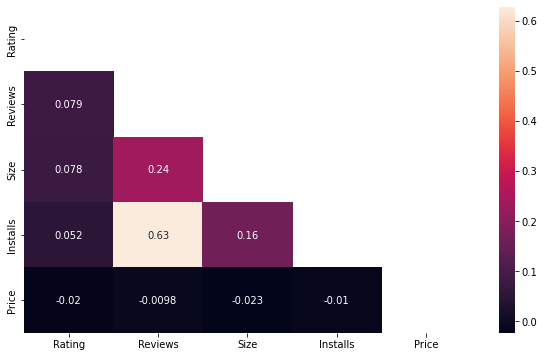

In [ ]:
plt.figure(figsize=(10,6))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask = mask)
plt.show

In [ ]:
#Getting Unique Content_Rating Values and Plotting the bar graph
app_data_1.Content_Rating.unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

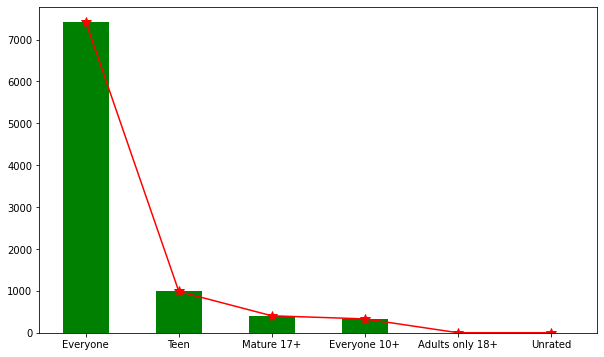

In [ ]:
plt.figure(figsize=(10,6))
pd.value_counts(app_data_1['Content_Rating']).plot(kind='bar', color='Green')
pd.value_counts(app_data_1['Content_Rating']).plot(kind='line', marker='*', color='red', ms=10)


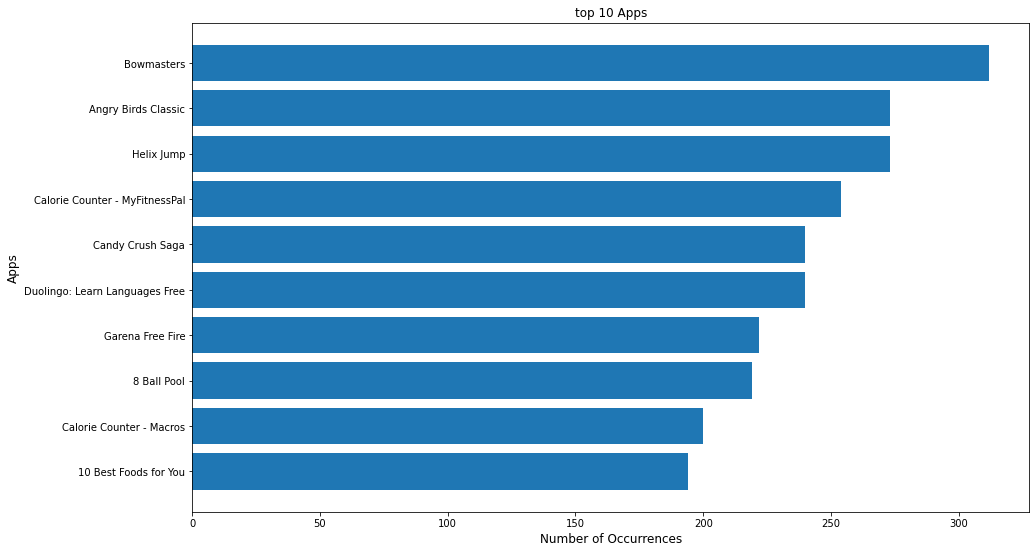

In [ ]:
#Plotting Graph of Top 10 Apps to their Occurences in the reviews
user_reviews_1_count  = user_reviews_1['App'].value_counts()
user_reviews_1_count = user_reviews_1_count[:10,].sort_values(ascending = True)
plt.figure(figsize=(15,9))
y=user_reviews_1_count.index
x=user_reviews_1_count.values
plt.barh(y, x)
plt.title('top 10 Apps')
plt.ylabel('Apps', fontsize=12)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.show()


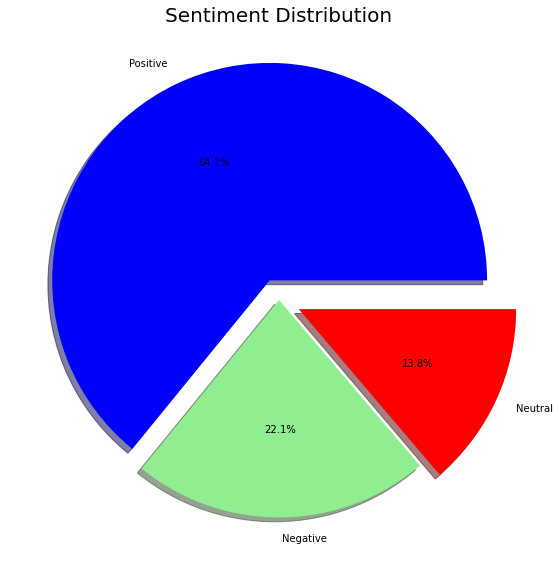

In [ ]:
#Pie Chart of Sentiment Distribution
plt.figure(figsize=(10,10))
labels = user_reviews_1['Sentiment'].value_counts(sort = True).index
sizes = user_reviews_1['Sentiment'].value_counts(sort = True)
colors = ["blue","lightgreen", "red"]
explode = (0.1,0,.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Sentiment Distribution',size = 20)
plt.show()

# **Conclusion**
Summarizing our findings

This PlayStore and User_Reviews dataset appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented. First, we have found which category apps are getting installs more, it will tell us which categories of apps we should work on, we have found that the top category is FAMILY with 1973 installs. Next, we have figured out what kind of aged people giving the maximum ratings to the app. Next, we can know the Top 10 apps as per the reviews on the app store, and lastly, the sentiment analysis happens as per positive, negative, and neutral reactions to the apps.

Overall, we discovered a very good number of interesting relationships between Apps and explained each step of the process. This data analytics is very much mimicked on a higher level on the Playstore data/Machine Learning team for better business decisions, control over the platform, marketing initiatives, implementation of new apps, and much more. Therefore, I hope this kernel helps everyone!
